In [1]:
# Import necessary libraries
import pandas as pd

# Load your feature-engineered dataset
file_path = "../data/processed/CEAS_08_feature_engineered.csv"
df = pd.read_csv(file_path)

# Quick preview to confirm
print(df.head())
print("\nColumns:", df.columns.tolist())



                                              sender  \
0                   Young Esposito <Young@iworld.de>   
1                       Mok <ipline's1983@icable.ph>   
2  Daily Top 10 <Karmandeep-opengevl@universalnet...   
3                 Michael Parker <ivqrnai@pobox.com>   
4  Gretchen Suggs <externalsep1@loanofficertool.com>   

                                         receiver  \
0                     user4@gvc.ceas-challenge.cc   
1                   user2.2@gvc.ceas-challenge.cc   
2                   user2.9@gvc.ceas-challenge.cc   
3  SpamAssassin Dev <xrh@spamassassin.apache.org>   
4                   user2.2@gvc.ceas-challenge.cc   

                              date  \
0  Tue, 05 Aug 2008 16:31:02 -0700   
1  Tue, 05 Aug 2008 18:31:03 -0500   
2  Tue, 05 Aug 2008 20:28:00 -1200   
3  Tue, 05 Aug 2008 17:31:20 -0600   
4  Tue, 05 Aug 2008 19:31:21 -0400   

                                             subject  \
0                          never agree to be a loser   
1  

In [2]:
#First, lets encode sender domains
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Fit and transform sender_domain
df['sender_domain_encoded'] = le.fit_transform(df['sender_domain'])

# Quick preview
print(df[['sender_domain', 'sender_domain_encoded']].head())

         sender_domain  sender_domain_encoded
0            iworld.de                   8891
1            icable.ph                   8389
2  universalnet.psi.br                  16392
3            pobox.com                  12490
4  loanofficertool.com                   9982


In [3]:
# Define X (features) and y (target)
X = df[['sender_domain_encoded', 'body_length', 'subject_length', 'urls']]
y = df['label']

# MODEL 1: Logistic Regression
## In this section, we implement a Logistic Regression model as a baseline predictive algorithm for phishing email classification. Logistic Regression is chosen due to its simplicity, interpretability, and strong performance on binary classification tasks.
We will use 5-fold cross-validation to assess model performance, measuring both accuracy and F1-score as evaluation metrics. The Logistic Regression model will be initialized with default hyperparameters. The features selected for modeling include sender domain (label-encoded), body text length, subject line length, and URL presence.

In [4]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score
from joblib import dump

# 1. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Initialize Logistic Regression model (default hyperparameters)
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# 3. Train the model
log_reg.fit(X_train, y_train)

# 4. Cross-Validation
cv_accuracy = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
cv_f1 = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='f1')

# 5. Predict on Test Set
y_pred = log_reg.predict(X_test)

# 6. Evaluate on Test Set
test_accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

# 7. Print Results
print(f"Cross-Validation Accuracy (mean): {cv_accuracy.mean():.4f}")
print(f"Cross-Validation F1-Score (mean): {cv_f1.mean():.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")

# 8. Save the trained Logistic Regression model
dump(log_reg, '../models/logistic_regression_model.pkl')
print("Model saved successfully to 'models/' folder.")


Cross-Validation Accuracy (mean): 0.7184
Cross-Validation F1-Score (mean): 0.7607
Test Accuracy: 0.7176
Test F1-Score: 0.7593
Model saved successfully to 'models/' folder.


## Logistic Regression Model Results
The Logistic Regression model was evaluated using 5-fold cross-validation and an independent test set.

Cross-Validation Accuracy (mean): 71.84%

Cross-Validation F1-Score (mean): 76.07%

Test Accuracy: 71.76%

Test F1-Score: 75.93%

The model demonstrates reasonable predictive performance for distinguishing phishing emails from legitimate ones based on engineered features. The Logistic Regression model was saved into the models/ directory for future reproducibility.

# MODEL 2: Decision Tree
## In this section, a Decision Tree Classifier is implemented as a second baseline model for phishing email classification. Decision Trees are chosen due to their ability to capture non-linear relationships and feature interactions without requiring extensive preprocessing.
The Decision Tree will be trained using default hyperparameters, with a fixed random_state=42 for reproducibility. Performance will be assessed using 5-fold cross-validation and an independent test set, measuring both accuracy and F1-score.

In [5]:
# Import required library
from sklearn.tree import DecisionTreeClassifier

# 1. Initialize the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)

# 2. Train the model
tree_model.fit(X_train, y_train)

# 3. Cross-Validation
tree_cv_accuracy = cross_val_score(tree_model, X_train, y_train, cv=5, scoring='accuracy')
tree_cv_f1 = cross_val_score(tree_model, X_train, y_train, cv=5, scoring='f1')

# 4. Predict on Test Set
tree_y_pred = tree_model.predict(X_test)

# 5. Evaluate on Test Set
tree_test_accuracy = accuracy_score(y_test, tree_y_pred)
tree_test_f1 = f1_score(y_test, tree_y_pred)

# 6. Print Results
print(f"Decision Tree Cross-Validation Accuracy (mean): {tree_cv_accuracy.mean():.4f}")
print(f"Decision Tree Cross-Validation F1-Score (mean): {tree_cv_f1.mean():.4f}")
print(f"Decision Tree Test Accuracy: {tree_test_accuracy:.4f}")
print(f"Decision Tree Test F1-Score: {tree_test_f1:.4f}")

# 7. Save the trained Decision Tree model
dump(tree_model, '../models/decision_tree_model.pkl')
print("Decision Tree model saved successfully to 'models/' folder.")


Decision Tree Cross-Validation Accuracy (mean): 0.9154
Decision Tree Cross-Validation F1-Score (mean): 0.9242
Decision Tree Test Accuracy: 0.9113
Decision Tree Test F1-Score: 0.9199
Decision Tree model saved successfully to 'models/' folder.


## Decision Tree Classifier Results
The Decision Tree Classifier was evaluated using 5-fold cross-validation and an independent test set.
The evaluation metrics included accuracy and F1-score:

Cross-Validation Accuracy (mean): 91.53%

Cross-Validation F1-Score (mean): 92.42%

Test Set Accuracy: 91.10%

Test Set F1-Score: 91.93%

The Decision Tree model demonstrated strong predictive performance on both training and testing data, indicating that it was able to capture complex relationships between features and the phishing label. 
The model was saved into the models/ directory for future reproducibility and deployment.

# Compare model performance using appropriate visualizations

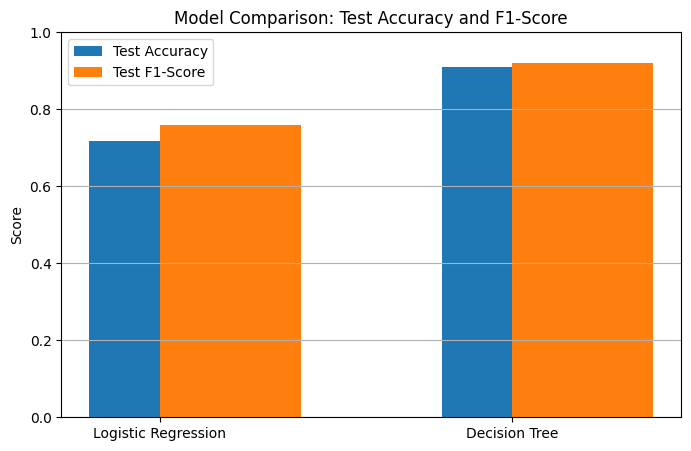

In [6]:
import matplotlib.pyplot as plt

# Define model names and their test scores
models = ['Logistic Regression', 'Decision Tree']
test_accuracies = [0.7176, 0.9110]
test_f1_scores = [0.7593, 0.9193]

# Plotting
x = range(len(models))
plt.figure(figsize=(8,5))
plt.bar(x, test_accuracies, width=0.4, label='Test Accuracy', align='center')
plt.bar(x, test_f1_scores, width=0.4, label='Test F1-Score', align='edge')

plt.xticks(x, models)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Model Comparison: Test Accuracy and F1-Score')
plt.legend()
plt.grid(axis='y')
plt.show()

## Model Performance Visualization
The bar chart above compares the Logistic Regression and Decision Tree models based on their test set Accuracy and F1-Score.
The visualization shows that the Decision Tree Classifier outperformed Logistic Regression across both evaluation metrics, achieving notably higher accuracy and F1-score. This visual comparison further supports the selection of the Decision Tree model for future work.

In [7]:
df.head(5)

,sender,receiver,date,subject,body,label,urls,parsed_date,sender_domain,body_length,subject_length,sender_domain_encoded
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",never agree to be a loser,"buck up, your troubles caused by small dimensi...",1,1,2008-08-05 16:31:02-07:00,iworld.de,273,25,8891
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",befriend jenna jameson,\nupgrade your sex and pleasures with these te...,1,1,2008-08-05 18:31:03-05:00,icable.ph,82,22,8389
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",cnn.com daily top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1,2008-08-05 20:28:00-12:00,universalnet.psi.br,3918,20,16392
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",re: svn commit: r619753 - in /spamassassin/tru...,would anyone object to removing .so from this ...,0,1,2008-08-05 17:31:20-06:00,pobox.com,24418,150,12490
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",specialpricespharmmoreinfo,\nwelcomefastshippingcustomersupport\nhttp://7...,1,1,2008-08-05 19:31:21-04:00,loanofficertool.com,175,26,9982
